# Исследование увелечения выручки интернет-магазина.


# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Ход исследования:

**Часть 1. Приоретизация гипотез.**

В таблице data приведено 9 гипотез  по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задачи:
-  Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
-  Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
-  Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста.**

Был проведен A/B-тест результаты, которого описаны в таблицах 'orders' и 'visitors'.

**Задачи:**

1. Провести анализ Анализ A/B-теста:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
2. Принять решение  по результатам теста и объясните его.

# Описание данных.

**1. Данные первой части:**
-  Hypothesis — краткое описание гипотезы;
-  Reach — охват пользователей по 10-балльной шкале;
-  Impact — влияние на пользователей по 10-балльной шкале;
-  Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**2. Данные второй части:**

**Таблица orders:**
-  transactionId — идентификатор заказа;
-  visitorId — идентификатор пользователя, совершившего заказ;
-  date — дата, когда был совершён заказ;
-  revenue — выручка заказа;
-  group — группа A/B-теста, в которую попал заказ.

**Таблица visitors:**

-  date — дата;
-  group — группа A/B-теста;
-  visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## 1. Загрузка данных и подготовка их к анализу.

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats





In [3]:
data= pd.read_csv('/datasets/hypothesis.csv')
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')


In [4]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
data.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [7]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

**Комментарий.** Проанализировав, данные таблицы "data". В данной таблице пропусков нет, дубликаты отсутвует и типя столбцов коректны.

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
orders.duplicated().sum()

0

**Комментарий.** В таблице "orders" отсутствуют дубликаьы и пропуски, только изменили тип данных столбцы 'date' на datetime.

In [14]:
visitors.head( )

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.head( )

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors['date']=visitors['date'].map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [20]:
visitors.duplicated().sum()

0

**Комментарий.** В таблице "visitors" отсутствуют дубликаьы и пропуски, только изменили тип данных столбцы 'date' на datetime.

**Комментарий.** Проанализировав данные трех таблиц можно сказать, что все данные корректны, целостны, дубликатов нет - и готовы к анализу. В процессе предобработки был поменян только тип столбца "date" на datetime

In [21]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()


group    58
dtype: int64

In [22]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()


In [23]:
orders = orders.query('visitorId not in @double_users')

### 1.1 Рассмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE. 

In [24]:
data['RICE']= (data['Reach']*data['Impact']*data['Confidence'])/data['Efforts']
display(data[['RICE', 'Hypothesis']].sort_values(by='RICE', ascending=False))

,RICE,Hypothesis
7,112.0,Добавить форму подписки на все основные страни...
2,56.0,Добавить блоки рекомендаций товаров на сайт ин...
0,40.0,"Добавить два новых канала привлечения трафика,..."
6,40.0,Показать на главной странице баннеры с актуаль...
8,16.2,"Запустить акцию, дающую скидку на товар в день..."
3,9.0,"Изменить структура категорий, что увеличит кон..."
1,4.0,"Запустить собственную службу доставки, что сок..."
5,4.0,"Добавить страницу отзывов клиентов о магазине,..."
4,3.0,"Изменить цвет фона главной страницы, чтобы уве..."


**Комментарий.** Исходя из анализа видно различие в обеих таблицах. Главное меняется тройка лидеров : если в ICE это гипотезы с индексами 8, 0, 7 , то в RICE - 7(была на 3 мете), 2(была на 5), 0(на 2); а лидер таблицы ICE - 8 сместился аж на пятыю позицыию, в то время как 2 перешел на второе место с пятого. Такое отличие продиктовано, тем что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок (в 7 он =10 - максимальный! А в 2 он =8,тоже высокий, а в лидере ICE - в 8 он минимальный =1). Поэтому надо предложить для тестирования гипотезу №7 и возможно еще №2.

## 2. Анализ A/B-теста


###  2.1 Построим график кумулятивной выручки по группам

In [24]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [25]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])                      

In [26]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      19      23   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      36      42   234381      1338
3 2019-08-02     B      39      40   221801      1294
4 2019-08-03     A      60      66   346854      1845


In [27]:
cumulativeRevenueA=cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB=cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]


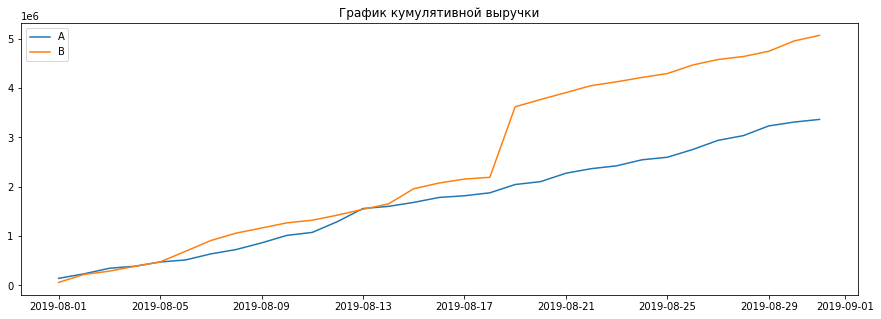

In [28]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'],label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки')
plt.show()

**Комментарий.** Из графика видно, что первая половина месяца выручка примерно растет планомерно без скачков, также выручка в группе В растет чуть быстрее, чем в группе А. Примерно 13 августа выручка группы А и В одинаковые. Во второй поливине месяца  ситуация меняется, выручка у группы B значительно растет и становиться значительно выше, ем у группы А. Так же стоить отметить что в период с 17 августа по 21 агутса у группы В произошел сильный всплеск в выручки, это может быть обусловлено большим количесвом заказов или крупные заказы. Если не считать данный всплеск , то выручки росли планомерно.

### 2.2  Построим график кумулятивного среднего чека по группам

Text(0.5, 1.0, 'График кумулятивного среднего чека')

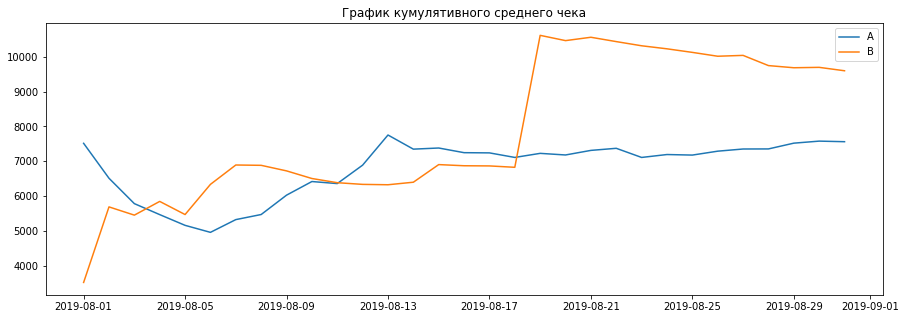

In [29]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека')

**Комментарий.** Данный график имеет схожесть с предыдущим.В превой половине месяца у группы В средний чек выше чем у группы А. Но также есть моменты, где средний чек выше у группы А а именно 1 августа, 12 августа -15 августа. Дальше уже чек группы В значительно больше. Также на грфике тоже отслеживатеся всплеск в группе B, послое дэтого сплеска видно, что выручка в группе B плавно снижается, а вот средний чек в группе А на протяжении всего месяцо плавно растет.

### 2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Text(0.5, 1.0, 'Гафик относительного изменения кумулятивного среднего чека группы B к группе A')

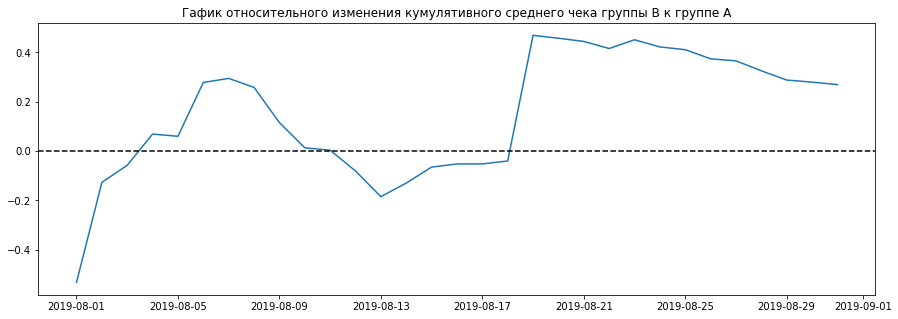

In [30]:
plt.figure(figsize=(15,5))
mergecumulativeRevenue=cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',right_on='date',how='left',suffixes=['A','B'])
plt.plot(mergecumulativeRevenue['date'],(mergecumulativeRevenue['revenueB']/mergecumulativeRevenue['ordersB'])/(mergecumulativeRevenue['revenueA']/mergecumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Гафик относительного изменения кумулятивного среднего чека группы B к группе A')

**Комментарий.** Средний чек группы B рос с 1 августа, 2 августа уже превысил "A" и рос до 7 августа. 7-8 пошло обратное движение до 13 августа, причем 3 дня 12-14 акгуста средний чек "A" был больше "B". Но не надолго, с 13 чек "B" опять начал расти и уже 15 августа наступил переломный момент и на следующий день чек "B" оказался больше и находился больше "A" до конца месяца. Опять же здесь хорошо видно, что 19 августа был сильный всплеск (рост) с аномально большим объемом, а в последующие дни средний чек "B" также постепенно снижался.

### 2.4 Построим график кумулятивного среднего количества заказов на посетителя по группам

Text(0.5, 1.0, 'График кумулятивной конверсии')

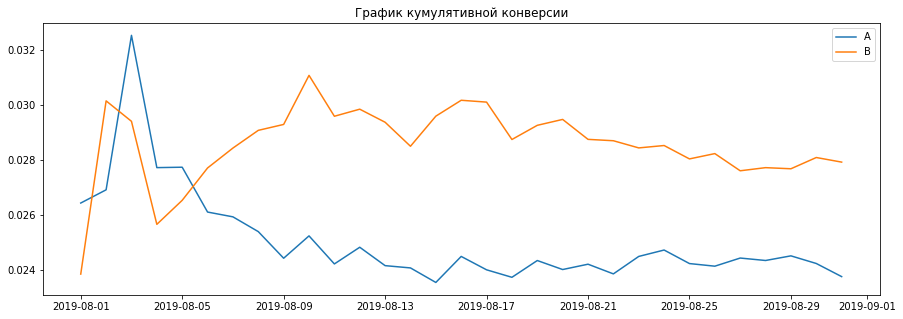

In [31]:
plt.figure(figsize=(15,5))
cumulativeData['conversion']=cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA=cumulativeData[cumulativeData['group']=='A']
cumulativeDataB=cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'],label='B')
plt.legend()
plt.title('График кумулятивной конверсии')


**Комментарий** Исходя из графика видно, что конверсия группы В значительно выше конверсии группы А.Но также есть периоды, когда конверсия группы А немного выше конверсии группы В примерно с 3 августа по 5 августа.

### 2.5 Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

No handles with labels found to put in legend.


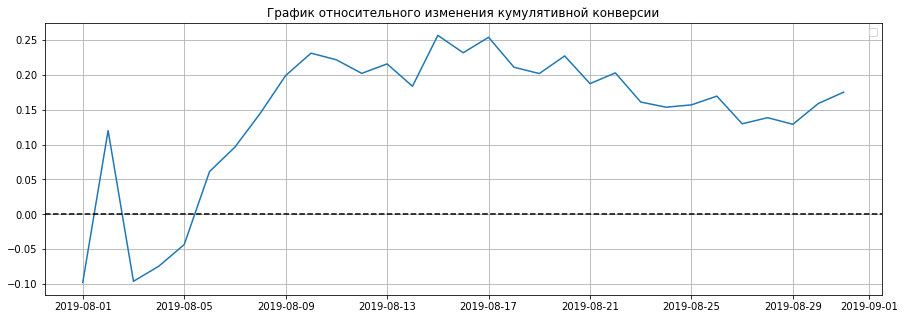

In [32]:
plt.figure(figsize=(15,5))
plt.grid()
mergecumulativeDataConversion=cumulativeDataA.merge(cumulativeDataB,left_on='date',right_on='date',how='left',suffixes=['A','B'])
plt.plot(mergecumulativeDataConversion['date'],mergecumulativeDataConversion['conversionB']/ mergecumulativeDataConversion['conversionA']-1)
plt.title('График относительного изменения кумулятивной конверсии')
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend()
plt.show()

 

**Комментарий.** Исходя их графика  можно сказать, что примерно с 3 вгуста по 5 августа конверсия группы А превышала конверисю группы В примерно на 3%. Далее начиная с 5 авгутса по 9 августа происходит сильный скачок  в росте конверсиси группы B, она повысилась на 22%. Самый высокий уровень конверсии был 15 и 17 августа 24%, далее конверсия идет на спад. 
 

###  2.6 Построим точечный график количества заказов по пользователям. 

In [33]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


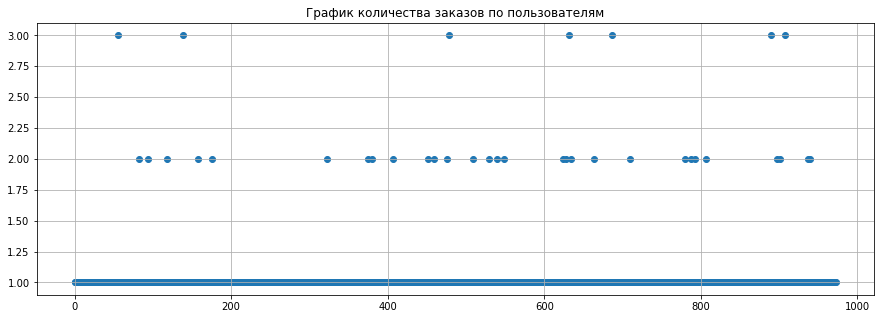

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']) 

**Комментарий.** Из графика видно, что больше всего пользователей, которые совершили одну покупку, меньше посетителей, совершившив 2 покупки. Совсем мало посетителей, совершивших 3 покупки, но пока рано судить явялется ли это выбросом, сложно пока сказать(точно будет известно после расчета 99 и 95 процентеля. Все пользователи, совершившие свыше 3 заказов явно является аномалией.

###  2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [35]:
print('95 и 99 процентиль по заказам:', np.percentile(ordersByUsers['orders'],[95,99]))

95 и 99 процентиль по заказам: [1. 2.]


**Комментарий.** 99% пользоватлей совершили меньше 2 заказов, установим её в качестве границы для аномалий.

### 2.8 Построим точечный график стоимостей заказов.

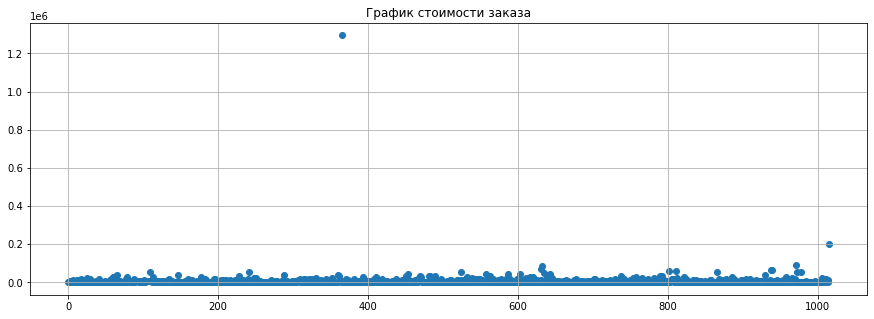

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимости заказа')
plt.scatter(x_values, orders['revenue']) 

**Комментарий.** Изучив график, видно явные выбросы свыше 200000. Поэтому срежем данные по нему и построим новый график более понятный.

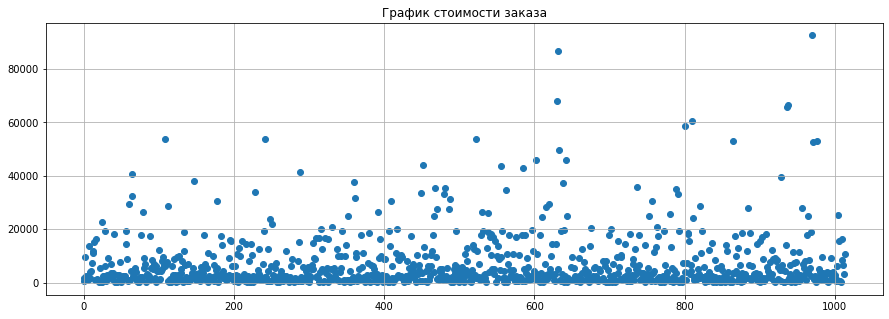

In [37]:
orders_new=orders[orders['revenue']<=200000]['revenue']
x_values = pd.Series(range(0,len(orders_new)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимости заказа')
plt.scatter(x_values, orders_new) 

**Коментарий.** Исходя из графика видно хорошо аномально большой заказа свыше 1.2 млн, такде примерно большая часть заказов набодится в диапозоне 100000. Но чтобы более точно узнать необходимо расчитать процентили.

###  2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов

In [38]:
print('95 и 99 процентиль по стоимости:', np.percentile(orders['revenue'],[95,99]))

95 и 99 процентиль по стоимости: [26785. 53904.]


**Комметарий.** 99% заказов меньше суммы 53904 , установим её в качестве границы для аномалий.

### 2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу. Для этого создадим несколько таблиц и затем объединим их:

In [39]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [40]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [41]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



**Проверим гипотезы**

**H0: Статистически значимых различий между конверсиями нет.**

**H1: Статистически значимые различия между конверсиями есть.**

In [42]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

alpha = 0.05
p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160


**Комментарий.** Так как p-value меньше alpha, то нулевую гипотезу мы отвергаем. А это значит, что  по «сырым» данным различия в конверсии групп A и B есть. Относительный выигрыш группы "В" к "А" составляет 13.8%

###  2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**H0:Статистически значимых различий между средними чеками групп нет.**

**Н1: Статистически значимые различия между средними чеками групп есть.**

In [43]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель В к А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительный показатель В к А: 0.287


**Комментарий.** Так как p-value больше alpha, то нулевую гипотезы мы не отвергаем. По сырым данным  средние чеки в группах схожи.Однако в группе B средний чек больше чем в групее А на 26%, но данное различие не является статистически значимым.

###  2.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] >  53904]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
Всего аномальных пользователей = 16


In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

**Проверим гипотезы**

**H0:Статистичеси значимых различий меду конверсиями групп нет.**

**H1:Статистически значиме различия между конверсиями групп есть.**

In [46]:
print('p-value=','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value= 0.007
Относительный показатель 'B' и 'A' = 0.189


**Комментарий.** Так p-value меньше 0.05, то нулевую гипотезу мы отвергаем. Это значит, что по "очищенным" данным различия в группе "В" и "А" есть. А относительный выигрыш группы "В" над "А" 17.4%(а по сырым данным 13.8%)

In [47]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.788
Относительный показатель 'B' и 'A' = -0.032


**Комментари.й**Так p-value>0.05, то нулевую гипотезу не отвергаем. А это значит что средние чеки в группе "А" и 
"В" схожи.А вот средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж на 26%, - и всё это из-за одного того самого аномального заказа

# 3. Вывод 

В ходе тестирования было выявлено:
- Что различия в конверсиях групп А и Б есть как на "сырых", так и на "очищенных" данных.Относительный выигрыш группы "B" над "A" равен 17,4% по "очищенным" и 13.8% по "сырым" данным.
- А вот разичий в средних чеках между гуппами А и В не оказалость как в " сырых", так и в "очищенных" данных. Несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше а ж на 26%, - и всё это из-за одного того самого аномального заказа.
**Результат тестирования:** Остановить тестирования и константировать успех группы В,  так как конверсия у данной группы значительно выше, чем у группы А, несмотря на примерно одиноковые средние чеки.
